In [1]:
#Calculating glass Transition temperature using quenching output  
# Authors: Marco Padilla Soto & Mohammed Al Otmi 
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.

#    modules to import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the Log file 
file = open("log_copy.lammps", "r")

#Below collects all data in the text file as a list of each line (as a list with each phrase/number as an element)
list_of_lists = []
for line in file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_lists.append(line_list)

file.close()

In [3]:
alldata=[]
breakpts=[]
for i in range(len(list_of_lists)):
    try:
        if list_of_lists[i][0] =='Step':
            data = list_of_lists[i+1:]
        for i in range(len(data)):
            if data[i][0]=='Loop':
                data = data[:i]
                breakpts.append(data[-1][0])
                alldata = alldata+data[-100:] #This only takes the last 10 points of data from each block
    except:
        pass

In [4]:
breakpts = [float(i) for i in breakpts] #this is a list of the last step point before a new block.

In [5]:
#Takes all blocks and converts it into a large dataframe
df=pd.DataFrame(alldata,columns=['Step','Volume','Density','Temp','Press','TotEng'])
for i in range(len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], downcast="float")


In [6]:
#slices the large dataframe at each break point and takes the average of 
#each column up to that row as a new row of a new dataframe. 
Final = pd.DataFrame(columns=['Volume','Density','Temp','Press','TotEng'])
dfc = df.copy()

for i in range(len(alldata)):
    try:
        for n in breakpts:
            if dfc.iloc[i,0]==n:
                Final = Final.append({'Volume' : dfc['Volume'].iloc[:i].mean(), 'Density' : dfc['Density'].iloc[:i].mean(),
                                  'Temp' : dfc['Temp'].iloc[:i].mean(),'Press' : dfc['Press'].iloc[:i].mean(),
                                  'TotEng' : dfc['TotEng'].iloc[:i].mean()}, ignore_index=True)
                dfc = dfc.iloc[i:,:]
    except:
        pass

Final.to_csv('Average_log_TRP20.csv')

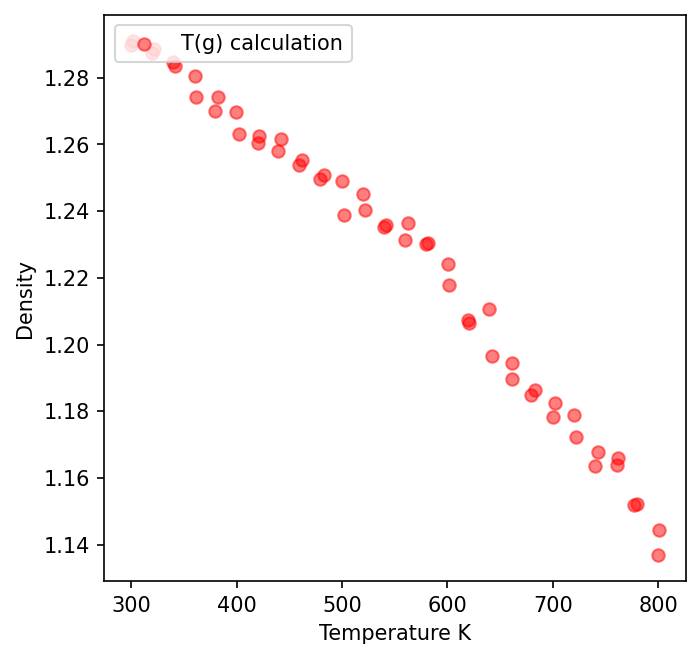

In [7]:
#Use Matpolt to plot density Vs Temperature
data = pd.DataFrame(Final)
data
plt.figure(figsize=(5,5), dpi=150)
plt.subplot(1,1,1)

plt.scatter(data['Temp'], data['Density'],c="r", alpha=0.5, marker='o',label="T(g) calculation")

x= data['Temp']
y= data['Density']

plt.xlabel("Temperature K")
plt.ylabel("Density")
plt.legend(loc='upper left')
plt.show()


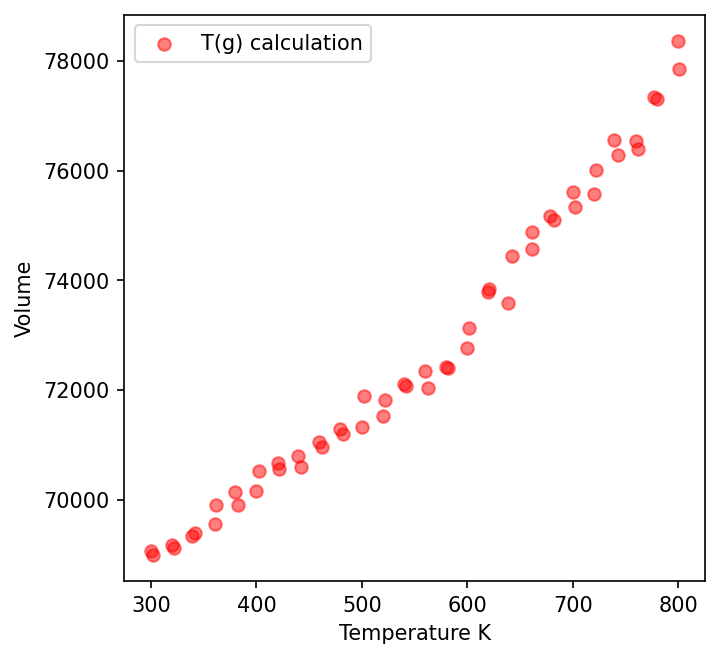

In [8]:
#Use Matplot to plot volume vs Temperature : 
data = pd.DataFrame(Final)
data
plt.figure(figsize=(5,5), dpi=150)
plt.subplot(1,1,1)

plt.scatter(data['Temp'], data['Volume'],c="r", alpha=0.5, marker='o',label="T(g) calculation")

x= data['Temp']
y= data['Volume']

plt.xlabel("Temperature K")
plt.ylabel("Volume")
plt.legend(loc='upper left')
plt.show()




                    Breakpoint Regression Results                     
No. Observations                       52
No. Model Parameters                    4
Degrees of Freedom                     48
Res. Sum of Squares           2.33033e+06
Total Sum of Squares          3.68327e+08
R Squared                        0.993673
Adjusted R Squared               0.993135
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                65168.0     2.26e+02       287.91      2.28e-79   6.4713e+04   6.5623e+04
alpha1               12.6803        0.516       24.559      7.88e-29       11.642       13.718
beta1                11.1577        0.833       13.402             -       9.4837       12.832
breakpoint1          574.672         11.0            -             -        552.6       596.75
-----------------

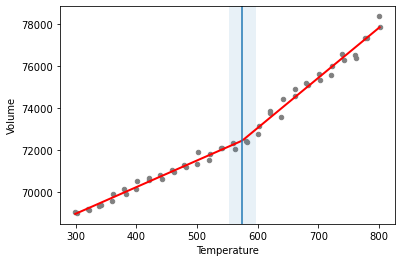

In [9]:
#implemet Piecewise-Regression to Find Tg 
import matplotlib.pyplot as plt
import numpy as np
import piecewise_regression
xx = list (x)
yy = list (y)
pw_fit = piecewise_regression.Fit(xx, yy, n_breakpoints=1)
pw_fit.summary()



# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Temperature")
plt.ylabel("Volume")
plt.show()
plt.close()